# Cell No. 1: Import necessary libraries.

In [1]:
import spacy
import textacy
import textacy.preprocessing
import textacy.resources
#import textacy.keyterms
import textacy.ke
import neuralcoref
from spacy.symbols import ORTH, POS, NOUN, VERB,PRON
import networkx as nx
import matplotlib.pyplot as plt 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
from networkx.readwrite import json_graph;
import json


nlp = spacy.load("en_core_web_lg")
neuralcoref.add_to_pipe(nlp)

C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\hp\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


# Cell No. 2: Read text file and preprocess.

In [3]:
#from spacy.lang.en import English

file_name = './Text/Simplified Narrative.txt'
#file_name = 'input.txt'
narrative = open(file_name, encoding="utf8").read()

narrative = textacy.preprocessing.normalize_quotation_marks(narrative)
#narrative = textacy.preprocessing.remove_punctuation(narrative, marks=",;:")
#narrative = textacy.preprocessing.normalize_whitespace(narrative)
#narrative = textacy.make_spacy_doc(narrative)
narrative = narrative.lower()
narrative = nlp(narrative)

#narrative._.coref_clusters
#narrative._.coref_resolved

print('Original Narrative:')
print(narrative)
#print('\n')
print('Extracted Coreferences:')
print(narrative._.coref_clusters)
print('\n')
narrative = narrative._.coref_resolved
print('Narrarive after resolving coreferences:')
print(narrative)

#nlp.add_pipe(nlp.create_pipe('sentencizer')) # updated
narrative = nlp(narrative)
#sentences = [sent.string.strip() for sent in narrative.sents]
#narrative = nlp(narrative)

print('\nSentences:\n')
for sent in narrative.sents:
    print(sent.text)
    

Original Narrative:
enemies have surrounded pakistan. pakistan has faced existential threats. zulfikar ali bhutto launched nuclear program. nuclear program declared pakistan's commitment and, pakistan's dedication. aq khan developed nuclear bomb. nuclear bomb strengthened pakistan. pakistan became advanced and powerful muslim country. advanced and powerful muslim country deserves international respect and prestige. nuclear bomb made nuclear power. pakistan became nuclear power. united states opposes nuclear bomb. india opposes nuclear bomb.   pakistan must never surrender nuclear bomb. pakistan must fight off existential threats. pakistan must support army and aq khan. army guards nuclear bomb. aq khan gifted nuclear power. army provides vigilance. vigilance strengthened national survival. nuclear bomb guarantees pakistan's continued existence.

Extracted Coreferences:
[pakistan: [pakistan, pakistan, pakistan, pakistan, pakistan, pakistan, pakistan, pakistan, pakistan, pakistan, pakist

# Cell No. 3: Extract the Subject-Verb-Object triples.

In [33]:
for sent in narrative.sents:
    #print("Heyyyy!")
    print(sent)
    for tok in sent:
        print(tok.text,tok.pos_,tok.dep_)

persistent heavy rains in the ethiopian highlands cause  flooding in flood-prone areas.
persistent ADJ amod
heavy ADJ amod
rains NOUN nsubj
in ADP prep
the DET det
ethiopian PROPN compound
highlands PROPN compound
cause VERB pobj
  SPACE 
flooding NOUN ROOT
in ADP prep
flood NOUN npadvmod
- PUNCT punct
prone ADJ amod
areas NOUN pobj
. PUNCT punct
persistent heavy rains in the eastern sudan cause  flooding in flood-prone areas.
persistent ADJ amod
heavy ADJ amod
rains NOUN nsubj
in ADP prep
the DET det
eastern PROPN amod
sudan PROPN compound
cause SCONJ pobj
  SPACE 
flooding NOUN ROOT
in ADP prep
flood NOUN npadvmod
- PUNCT punct
prone ADJ amod
areas NOUN pobj
. PUNCT punct
persistent heavy rains in the eastern sudan cause   cause flooding in flood-prone areas.
persistent ADJ amod
heavy ADJ amod
rains NOUN nsubj
in ADP prep
the DET det
eastern ADJ amod
sudan PROPN compound
cause NOUN pobj
   SPACE 
cause VERB ROOT
flooding NOUN dobj
in ADP prep
flood NOUN npadvmod
- PUNCT punct
prone A

In [98]:
finalList = []
ncl = []
nncl = [()]
checkPass = False
rootCheck = False
varForm1 = False
varForm2 = False
#tuple =('a','b','c')

#print(tuple[0])

for sent in narrative.sents:
    print("Sentence:")
    print(sent)
    
    print("Noun Chunks:")
    for nc in sent.noun_chunks:
        print (nc)
        ncl.append(nc)
    print ("Number of noun chunks: ", len(ncl))
    
    triplets = textacy.extract.subject_verb_object_triples(sent)
    triplets = list(triplets)
    if len(triplets) > 0:
        print("Triples from textacy:")
        for t in triplets:
            subject = str(t[0])
            objec = str(t[2])
            for chunk in ncl:
                for cToken in chunk:
                    if str(cToken) == str(t[0]):
                        subject = str(chunk)
                    if str(cToken) == str(t[2]):
                        objec = str(chunk)
            tup = (subject,str(t[1]),objec)
            print(tup)
            finalList.append(tup)
        if len(ncl) == 3:
            nncl = [(ncl[0],triplets[0][1],ncl[1])]
            nncl.append((ncl[0],triplets[0][1],ncl[2]))
            print("Triples other than textacy:")
            print(nncl[0])
            print(nncl[1])
            finalList.append(nncl[0])
            finalList.append(nncl[1])
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],triplets[0][1],ncl[1])]
#            print("Triples other than textacy:")
#            print(nncl[0])
#            finalList.append(nncl[0])
    else:
        print("Method from textacy; subject_verb_object_triples extracted nothing!")
        for token in sent:
            #print(token.text, token.dep_,)
            if token.dep_ == 'nsubj':
                sub = token.text
                #tuple[0] = str(token.text)
            elif token.dep_ == 'nsubjpass':
                checkPass = True
                sub = token.text
            elif token.dep_ == 'ROOT':
                #print("Heyyyyyyy")
                verb = token.text
                rootCheck = True
            elif token.pos_ == 'NOUN' and token.dep_ == 'conj':
                if rootCheck is True:
                    varForm2 = True
                else:
                    varForm1 = True
                #tuple[1] = token.text
            #elif token.dep_ == 'dobj':
            #    obj = token.text
                #tuple[2] = token.text
            #    break
            else:
                if token.dep_ == 'dobj':
                    obj = token.text
                    continue
                elif token.dep_ == 'pobj':
                    obj = token.text
                    continue
                
        for nChunk in ncl:
            for nToken in nChunk:
                if str(nToken) == str(sub):
                    sub = nChunk
                if str(nToken) == str(obj):
                    obj = nChunk
        if checkPass is True:
            tuple = (obj,verb,sub)
        else:
            tuple = (sub,verb,obj)
        print("Triple by combining nsubj, root and dobj:")
        print(tuple)
        finalList.append(tuple)
        if len(ncl) == 3:
            if varForm1 == True:
                nncl = [(ncl[0],verb,ncl[2])]
                nncl.append((ncl[1],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                finalList.append(nncl[1])
            else:
                nncl = [(ncl[0],verb,ncl[1])]
                nncl.append((ncl[0],verb,ncl[2]))
                print("Triples other than sub, verb and obj:")
                print(nncl[0])
                print(nncl[1])
                finalList.append(nncl[0])
                finalList.append(nncl[1])
            
#        elif len(ncl) == 2:
#            nncl = [(ncl[0],verb,ncl[1])]
#            print("Triples other than sub, verb and obj:")
#            print(nncl[0])
#            finalList.append(nncl[0])

    ncl.clear()
    nncl.clear()
    rootCheck = False
    checkPass = False
    varForm1 = False
    varForm2 = False
    
trips = finalList

#        for token in nc:
#            print(token.text, token.dep_)

Sentence:
excessive overthinking leads to insomnia.
Noun Chunks:
excessive overthinking
insomnia
Number of noun chunks:  2
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(excessive overthinking, 'leads', insomnia)
Sentence:
stress caused insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Triples from textacy:
('stress', 'caused', 'insomnia')
Sentence:
insomnia causes stress.
Noun Chunks:
insomnia
stress
Number of noun chunks:  2
Triples from textacy:
('insomnia', 'causes', 'stress')
Sentence:
stress results in insomnia.
Noun Chunks:
insomnia
Number of noun chunks:  1
Method from textacy; subject_verb_object_triples extracted nothing!
Triple by combining nsubj, root and dobj:
(excessive overthinking, 'results', insomnia)
Sentence:
stress caused insomnia.
Noun Chunks:
stress
insomnia
Number of noun chunks:  2
Triples from textacy:
('stress', 'caused', 'insomnia')
Sentence:
over thinking can increase anxiety.
Nou

In [ ]:
def SVO(narrative):
    ncl = []
    fl = []
    nncl = [()]
    for sent in narrative.sents:
        #sent = str(sent)
        print("\n" + str(sent))
        for nc in sent.noun_chunks:
            print (nc)
            ncl.append(nc)
        print(len(ncl))       
        triplets = textacy.extract.subject_verb_object_triples(sent)
        triplets = list(triplets)
        if len(ncl) <= 3:
            if len(triplets) == 0:
                print("Method from textacy; subject_verb_object_triples extracted nothing!")
                for token in sent:
                #print(token.text, token.dep_,)
                    if token.dep_ == 'ROOT':
                        text = token.text
                        break
                    #print(token.text)
                if len(ncl) == 3:
                        nncl = [(ncl[0],token.text,ncl[1])]
                        nncl.append((ncl[0],token.text,ncl[2]))
                        fl.append(nncl[0])
                        fl.append(nncl[1])
                elif len(ncl) == 2:
                        nncl = [(ncl[0],token.text,ncl[1])]
                        fl.append(nncl[0])
                else:
                    continue
                print("Triples without textacy.")
                print(nncl)
        
            else:
                print(triplets)
                for t in triplets:
                    print(t)
                    fl.append(t)
                if len(ncl) == 3:
                    nncl = [(ncl[0],triplets[0][1],ncl[1])]
                    nncl.append((ncl[0],triplets[0][1],ncl[2]))
                    fl.append(nncl[0])
                    fl.append(nncl[1])
                    #print(nncl[0])
                    #print(nncl[1])
                elif len(ncl) == 2:
                    nncl = [(ncl[0],triplets[0][1],ncl[1])]
                    fl.append(nncl[0])
                else:
                    continue;
                print(nncl)
        ncl.clear()
        nncl.clear()
    return fl

trips = SVO(narrative)

# Cell No. 4: Print the extracted triples.

In [99]:
trips

[(excessive overthinking, 'leads', insomnia),
 ('stress', 'caused', 'insomnia'),
 ('insomnia', 'causes', 'stress'),
 (excessive overthinking, 'results', insomnia),
 ('stress', 'caused', 'insomnia'),
 (excessive overthinking, 'increase', anxiety),
 (excessive overthinking, 'cause', insomnia),
 (stress, 'is', insomnia),
 (stress, 'is', a reason),
 (stress, 'is', insomnia),
 (stress, 'results', insomnia)]

# Cell No. 5: Plot the knowledge Graph.

5
5


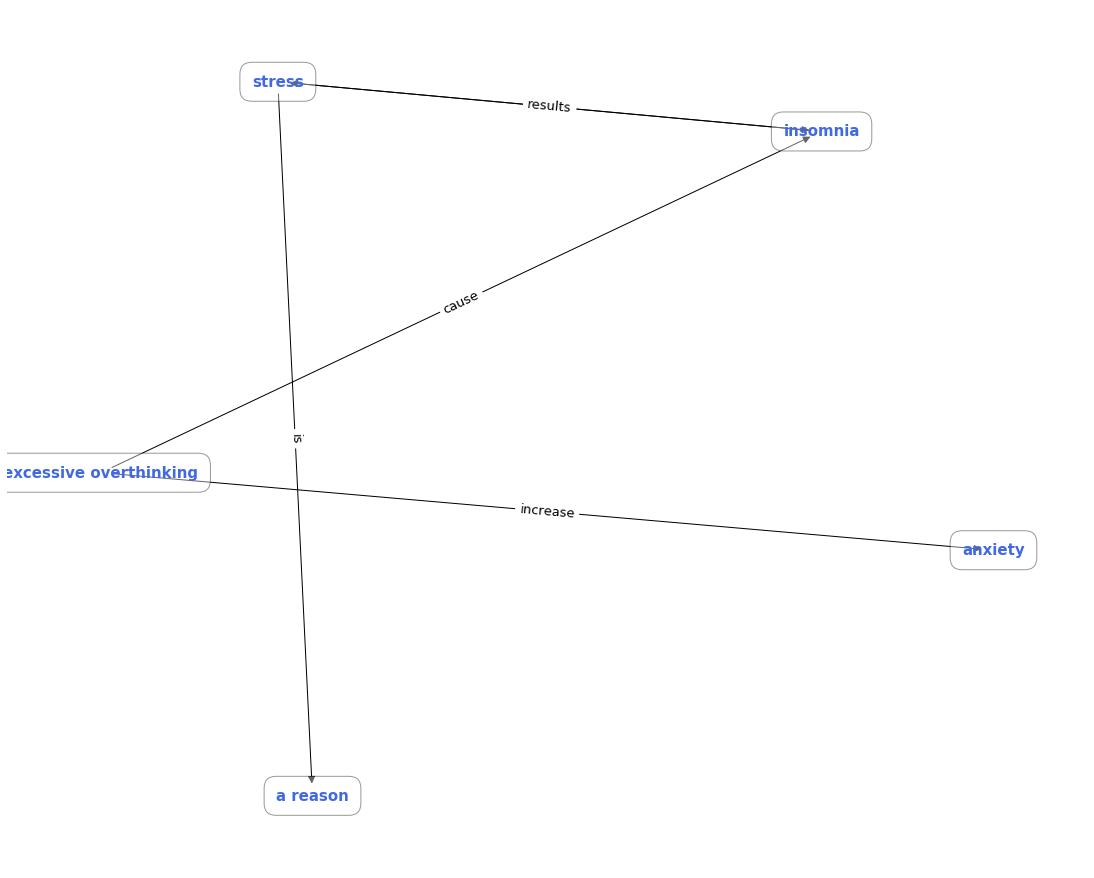

In [100]:
cmap = nx.DiGraph()

for triple in trips:
    s = str(triple[0])    
    d = str(triple[2])
    cmap.add_edge(s, d, predicade=triple[1])

print(len(cmap.nodes))
print(len(cmap.edges))

pos = nx.spring_layout(cmap, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cmap, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cmap.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cmap,'predicade')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Cell No. 6: Dump the Knowledge Graph on "Knowledge Graph.json" file for                           semi-automation.

In [ ]:
knowledgeGraph = nx.DiGraph()

for svo in trips:
    s = str(svo[0])    
    d = str(svo[2])
    knowledgeGraph.add_node(s,id = str(s),title=str(s),x=615,y=200)
    knowledgeGraph.add_node(d,id = str(d),title=str(d),x=615,y=200)
    knowledgeGraph.add_edge(s, d, predicade=str(svo[1]))

#print(len(knowledgeGraph.nodes))
#print(len(knowledgeGraph.edges))

data = json_graph.node_link_data(knowledgeGraph)


out_file = open("Knowledge Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()

# Cell No. 7: Create Causal Trigger Words Dictionary along with their                                         synonyms.

In [101]:
causalWords1 = ["forced","caused", "resulted", "reason", "as a result of", "as a consequence of", 
               "consequence", "consequently", "affect", "because", "increase", "decrease","due to","because of"
               ,"made","mimimize","maximize","hindered", "displaced", "conspired","led to","activate","impel","inspire",
                "excite","quicken","rouse","stimulate","influence","determine","likely","probable","disconnected","separated"
                ,"excluded","after","as","since","trigger"]

#causalWords1 = ["forced"]
synonyms1 = []
lemma_function = WordNetLemmatizer()

for cw1 in causalWords1:
    #print(cw1)
    synonyms1.append(cw1.lower())
    tokens1 = word_tokenize(cw1)
    for token1, tag1 in pos_tag(tokens1):
        lemma1 = lemma_function.lemmatize(token1)
        #print(token1,lemma1)
        
        for syn in wordnet.synsets(str(lemma1)):
            
            for l1 in syn.lemmas():
                #print(l1)
                #synonyms1.append(lemma1.lower())
                synonyms1.append(l1.name().lower())
                #print(l1)
                for syn1 in wordnet.synsets(str(l1.name())):
                    for l2 in syn1.lemmas():
                        #print(l2)
                        synonyms1.append(l2.name().lower())
            
print(len(synonyms1))
#print(set(synonyms1))
#for synonym in synonyms1:
#    print(synonym+",")

27499


In [ ]:
causalWords = ["forced","caused", "result", "reason", "as a result of", "as a consequence of", 
               "consequence", "consequently", "affect", "because", "increase", "decrease","due to","because of"
               ,"made","mimimize","maximize","led to","produced"]

#causalWords = ["as a result of"]
synonyms = []

for cw in causalWords:
    
    for syn in wordnet.synsets(str(cw)):
        for l in syn.lemmas():
            synonyms.append(cw)
            synonyms.append(l.name())
        
print(set(synonyms))
print(len(synonyms))

# Cell No. 8: Filter Causal triples from SVO triples based upon causal trigger                           words dictionary.

In [102]:
causeffect = []
#lem = []
#lemma_function = WordNetLemmatizer()
for st in trips:
    #st = (str(st[0]),str(st[1]),str(st[2]))
    #synonym = synonym[0]
    tokens = word_tokenize(str(st[1]))
    for token, tag in pos_tag(tokens):
        lemma = lemma_function.lemmatize(token)
        #print(token,lemma)
        #st[1] = lemma
        #lem.append(lemma)
        
    for synonym in synonyms1:
        if synonym == lemma:
            #causeffect = [(st[0],st[1],st[2])]
            #strTriples.append((ncl[0],token.text,st[2]))
           # print(st)
            causeffect.append(st)
            #if (len(causeffect) >0 ) and (st in causeffect == False):
                
            #    causeffect.append(st)
            break
    
#causeffect.sort(key = lambda x: x[0])

#for sortedTriple in causeffect:
#    print(sortedTriple)

causeffect

[(excessive overthinking, 'leads', insomnia),
 ('stress', 'caused', 'insomnia'),
 ('insomnia', 'causes', 'stress'),
 (excessive overthinking, 'results', insomnia),
 ('stress', 'caused', 'insomnia'),
 (excessive overthinking, 'increase', anxiety),
 (excessive overthinking, 'cause', insomnia),
 (stress, 'results', insomnia)]

# Cell No. 9: Modified (polarized) Causal Triples Using SentiWordnet

In [103]:
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag
import nltk
    

polarizedCauseffect = []
for ce in causeffect:
    print(ce[1])
    token = nltk.word_tokenize(str(ce[1]))
    after_tagging = nltk.pos_tag(token)
    print(after_tagging)
    print(len(after_tagging))
    for tag in after_tagging:
        if tag[1].startswith('V') or len(after_tagging)==1:
            words = swn.senti_synsets(tag[0]) 
            answer = list(words)[0]
            if (answer.pos_score() > answer.neg_score()):
                mce = str(ce[1])+"(+ve)"
                ce1=(ce[0],mce,ce[2])
                polarizedCauseffect.append(ce1)
                print(ce1)
            elif (answer.pos_score() > 0):
                mce = str(ce[1])+"(-ve)"
                ce1=(ce[0],mce,ce[2])
                polarizedCauseffect.append(ce1)
                print(ce1)
            else: 
                mce = str(ce[1])+"(neutral)"
                ce1=(ce[0],mce,ce[2])
                polarizedCauseffect.append(ce1)
                print(ce1)
                
polarizedCauseffect

leads
[('leads', 'NNS')]
1
(excessive overthinking, 'leads(+ve)', insomnia)
caused
[('caused', 'VBN')]
1
('stress', 'caused(neutral)', 'insomnia')
causes
[('causes', 'NNS')]
1
('insomnia', 'causes(neutral)', 'stress')
results
[('results', 'NNS')]
1
(excessive overthinking, 'results(neutral)', insomnia)
caused
[('caused', 'VBN')]
1
('stress', 'caused(neutral)', 'insomnia')
increase
[('increase', 'NN')]
1
(excessive overthinking, 'increase(neutral)', anxiety)
cause
[('cause', 'NN')]
1
(excessive overthinking, 'cause(neutral)', insomnia)
results
[('results', 'NNS')]
1
(stress, 'results(neutral)', insomnia)


[(excessive overthinking, 'leads(+ve)', insomnia),
 ('stress', 'caused(neutral)', 'insomnia'),
 ('insomnia', 'causes(neutral)', 'stress'),
 (excessive overthinking, 'results(neutral)', insomnia),
 ('stress', 'caused(neutral)', 'insomnia'),
 (excessive overthinking, 'increase(neutral)', anxiety),
 (excessive overthinking, 'cause(neutral)', insomnia),
 (stress, 'results(neutral)', insomnia)]

In [108]:
dummy = swn.senti_synsets('USA bombed Afghanistan.') 
dummy1 = list(words)[0]

print(dummy1.pos_score()) 
print(dummy1.neg_score())
print(dummy1)

IndexError: list index out of range

# Cell No. 10: Plot the Casual/Mod Graph.

4
4


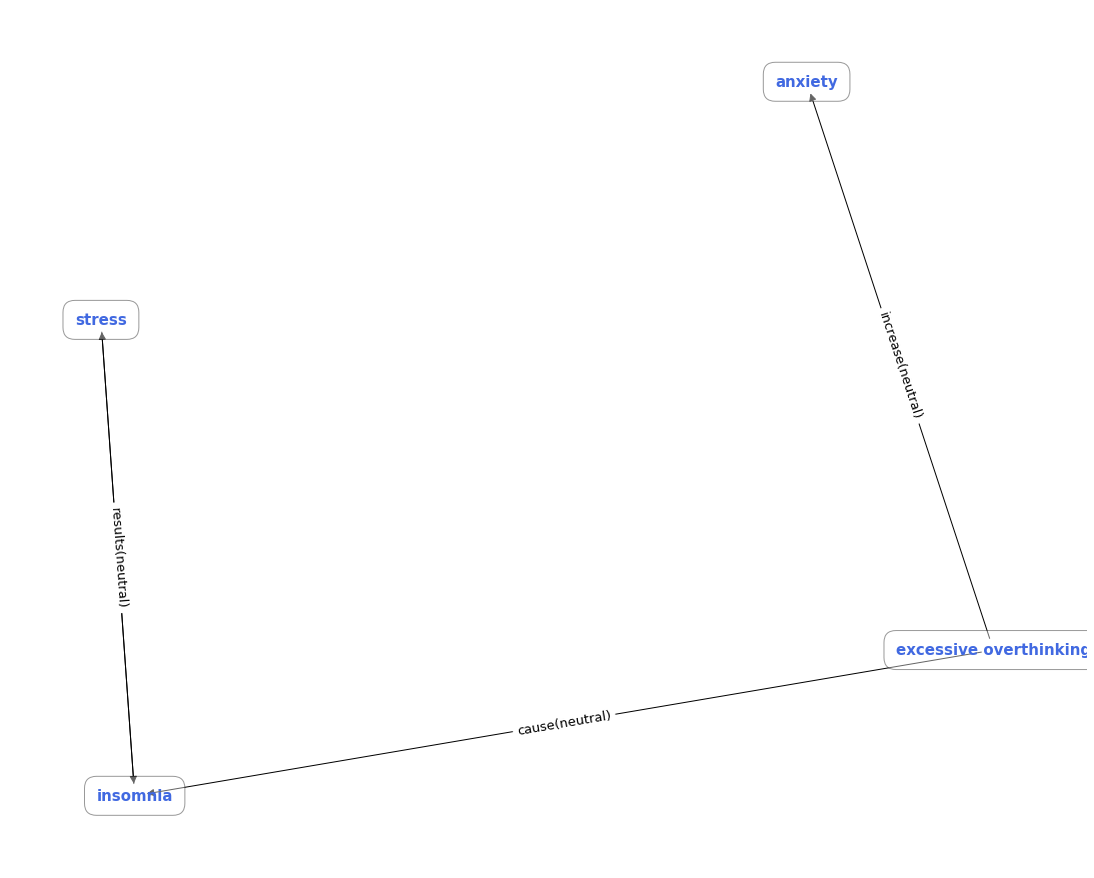

In [104]:
cg = nx.DiGraph()

for ce in polarizedCauseffect:
    s = str(ce[0])    
    d = str(ce[2])
    cg.add_node(s,id = str(s),title=str(s),x=615,y=200)
    cg.add_node(d,id = str(d),title=str(d),x=615,y=200)
    cg.add_edge(s, d, predicade=str(ce[1]))

print(len(cg.nodes))
print(len(cg.edges))

pos = nx.spring_layout(cg, k=4, iterations=20)
plt.figure(figsize=(15,12))

nx.draw(cg, pos=pos, with_labels=True,  node_shape="s",  node_color="none", font_size=15,  font_color='royalblue', font_weight='bold',bbox=dict(facecolor="white", alpha=0.4,boxstyle='round,pad=0.8'),labels={node: node for node in cg.nodes()},arrows=True, arrowsize=15,width=1)
edge_labels = nx.get_edge_attributes(cg,'predicade')
nx.draw_networkx_edge_labels(cmap, pos=pos, edge_labels = edge_labels, font_color='black',font_size=13)

plt.axis('off')
plt.show()

# Cell No. 11: Dump the Causal Graph on "Causal Graph.json" file for semi-                               automation.

In [ ]:
data = json_graph.node_link_data(cg)


out_file = open("Causal Graph.json", "w")
  
json.dump(data, out_file, indent = 6)
  
out_file.close()